# Determining the group of wines using K-Means clustering

It's presented data that are the results of a chemical analysis of wines grown in the same region in Italy but derived from different cultivars. The analysis determined the quantities of 13 constituents found in each type of wines.

The attributes are:

1) Alcohol

2) Malic acid

3) Ash

4) Alcalinity of ash  

5) Magnesium

6) Total phenols

7) Flavanoids

8) Nonflavanoid phenols

9) Proanthocyanins

10) Color intensity

11) Hue

12) OD280/OD315 of diluted wines

13) Proline 

(These attributes were dontated by Riccardo Leardi, riclea@anchem.unige.it )

## Data source:

This dataset was provided by Stefan Aeberhard and M. Forina. It can be accessed from the [UC Irvin Machine Learning Repository](https://archive.ics.uci.edu/dataset/109/wine)

## Load libraries:

In [95]:
# Import standard operational packages.
import numpy as np
import pandas as pd

# Important tools for modeling and evaluation.
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Import visualization packages.
import matplotlib.pyplot as plt
import seaborn as sns

## Load data:

In [96]:
col_names = ['Class_id', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins', 'Color_intensity', 'Hue', 'OD280/OD315_of_diluted wines', 'Proline']

wines_df = pd.read_csv("wine.data", names = col_names)

# EDA:

The exploratory data analysis will help us understanding our data.

## Data inspection:

In [97]:
wines_df.head(10)

,Class_id,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [98]:
wines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class_id                      178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic_acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity_of_ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total_phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid_phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color_intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315_of_diluted wines  178 non-null    float64
 13  Proli

In [99]:
wines_df.describe()

,Class_id,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [100]:
wines_df.shape

(178, 14)

In [101]:
wines_df.size

2492

## Data cleaning:

An assumption of K-means is that there are no missing values. Lets check for missing values in the rows of the data.

In [102]:
wines_df.isnull().sum()

Class_id                        0
Alcohol                         0
Malic_acid                      0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
OD280/OD315_of_diluted wines    0
Proline                         0
dtype: int64

## Data visualization:

Lets check if there is any correlation between variables. We exclude the first column, it's not relevant.

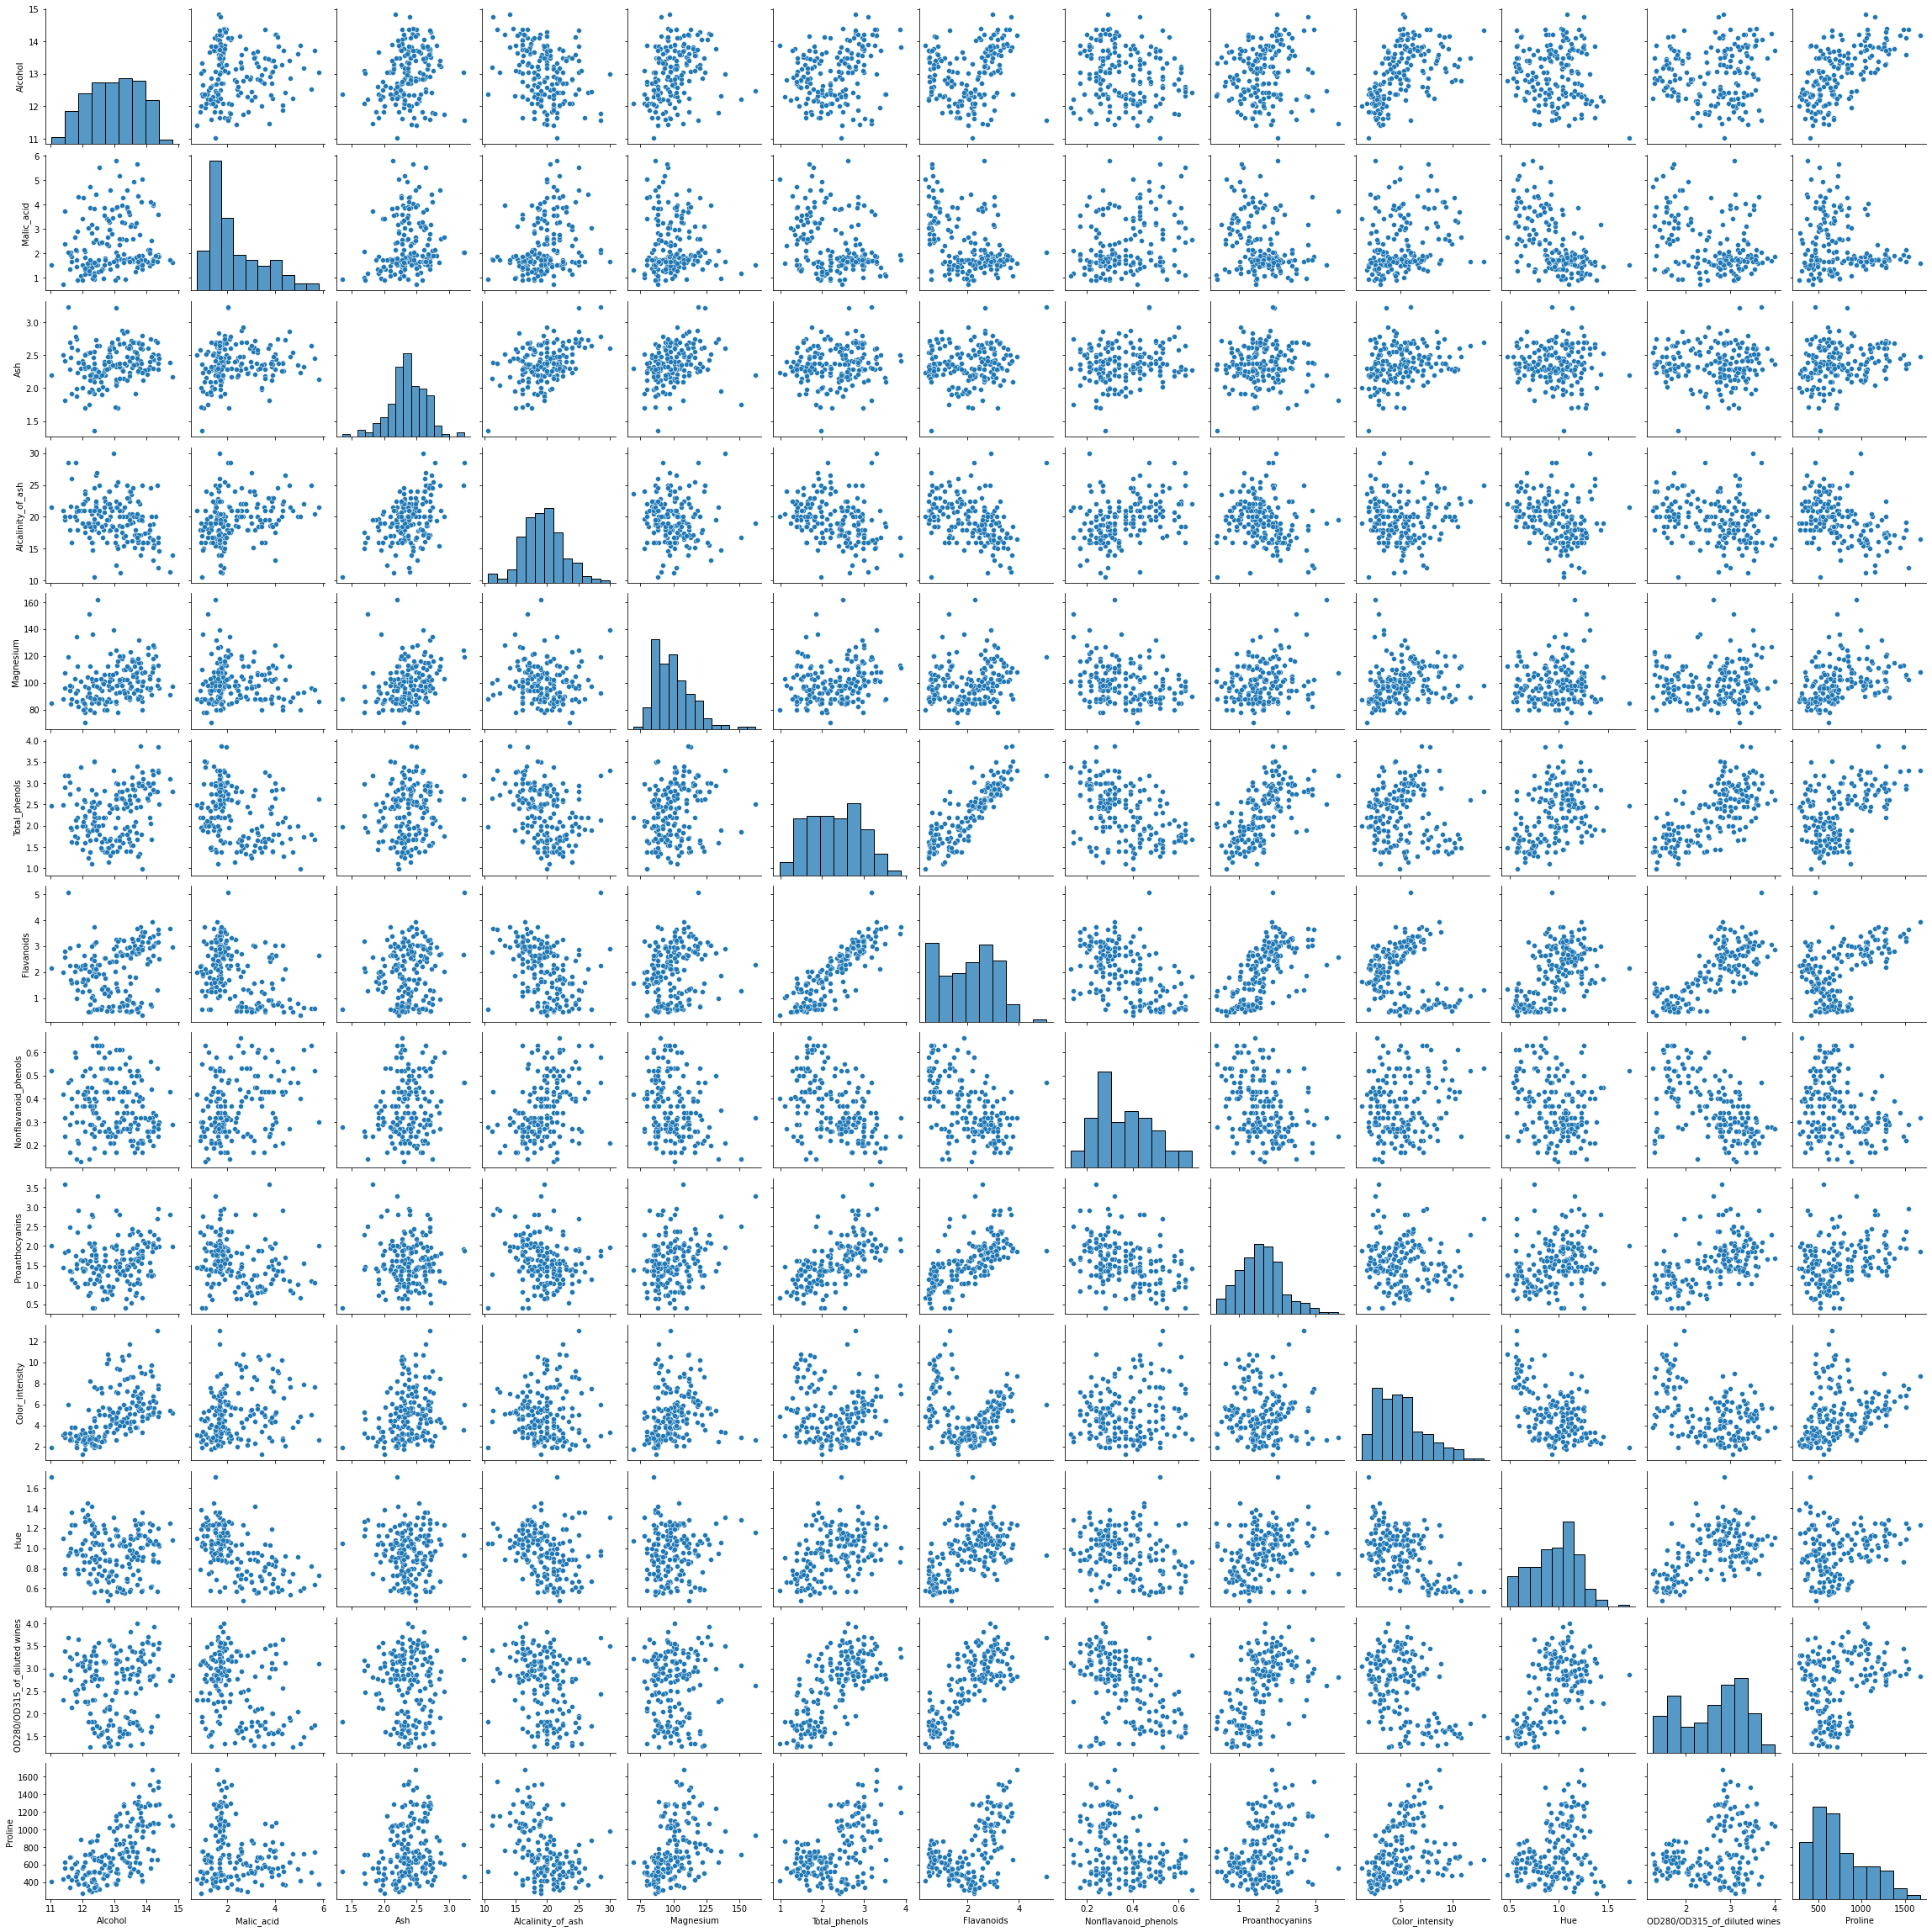

In [103]:
sns.pairplot(wines_df.iloc[:,1:], hue=None, palette='Viridis')

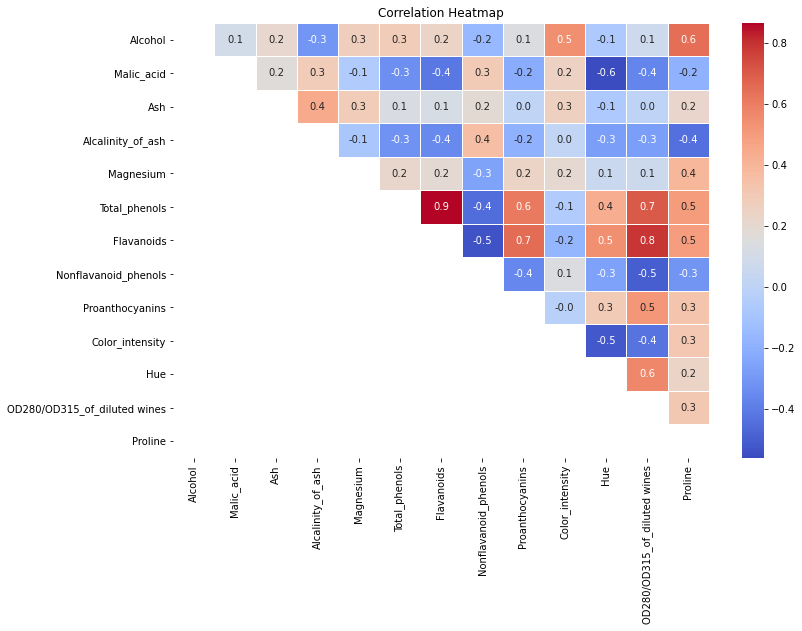

In [104]:
corr_matrix = wines_df.iloc[:,1:].corr()
mask= np.tril(corr_matrix)

plt.figure(figsize=(12, 8))  
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.5, mask=mask)
plt.title("Correlation Heatmap")
plt.show()

## Feature engineering:

Lets preparare our data before clustering.

### Feature selection:

In [105]:
wines_subset = wines_df.drop(['Class_id'], axis = 1)

wines_subset.head()

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Feature transformation:

Because K-means uses distance between observations as its measure of similarity, it's important to scale the data before modeling.

In [106]:
scaler = StandardScaler().fit(wines_subset)

wines_subset_scaled = scaler.transform(wines_subset)

# Data modeling:

## Evaluate Inertia

Because we don't know how many clusters exist in the data, lets start by fitting K-means and examining the inertia values for different values of k.

In [107]:
def kmeans_inertia(k, X):
        '''
    Fits a KMeans model for different values of k.
    Calculates an inertia score for each k value.

    Args:
        k: (list of ints) - The different k values to try
        X: (array) - The training data         

    Returns: 
        inertia: (list) - A list of inertia scores, one for each value of k
    '''
        
        inertia = []
        
        for i in k:
            kms = KMeans(n_clusters = i, random_state = 42)
            kms.fit(X)            
            inertia.append(kms.inertia_)
        
        return inertia

In [108]:
num_clusters = [i for i in range(2, 11)]

Inertia = kmeans_inertia(num_clusters, wines_subset_scaled)

Inertia

[1659.0079672511504,
 1277.928488844643,
 1175.7051928197127,
 1104.861683962532,
 1042.3872037251417,
 988.0533283180057,
 940.708165089653,
 902.0783170433883,
 866.7991687164842]

## Elbow method

We use the elbow method to find the optimal number of clusters. Plotting the inertia values in a simple line graph with the k values along the x-axis, we could see an "elbow", which is usually the part of the curve with the sharpest angle.

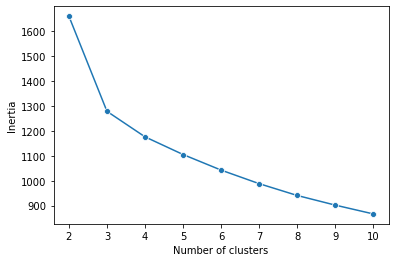

In [109]:
plot = sns.lineplot(x=num_clusters, y=Inertia, marker = 'o')
plot.set_xlabel("Number of clusters");
plot.set_ylabel("Inertia");

The plot seems to depict an elbow at 3 clusters, but there isn't a clear method for confirming that a three-cluster model is optimal. Therefore, we'll check the silhouette scores.

## Evaluate Silhouette scores

Silhouette score provide insights as to what the optimal value for k should be, and uses both intracluster and intercluster measurements in its calculations.

In [142]:
def kmeans_sil(k, X):
    '''
    Fits a KMeans model for different values of k.
    Calculates a silhouette score for each k value

    Args:
        k: (list of ints) - The different k values to try
        X: (array) - The training data

    Returns: 
        sil_scores: (list) - A list of silhouette scores, one for each value of k
    '''
    
    sil_scores = []
    
    for i in k:
        kms = KMeans(n_clusters = i, random_state = 42)
        kms.fit(X)
        sil_scores.append(silhouette_score(X, kms.labels_))
        
    return sil_scores

In [111]:
sil_scores = kmeans_sil(num_clusters,wines_subset_scaled)

sil_scores

[0.26831340971052126,
 0.2848589191898987,
 0.25173343011696475,
 0.2271732547624458,
 0.19582485390848947,
 0.20913005310687274,
 0.13581656516941268,
 0.14576057110571292,
 0.13394527355239233]

We can plot the silhouette score for each value of k, just as we did for inertia. However, for silhouette score, greater numbers (closest to 1) are better, so we hope to see at least one clear "peak" that is close to 1.

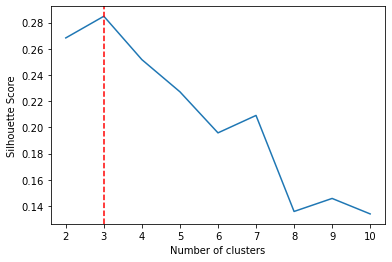

In [112]:
plot = sns.lineplot(x=num_clusters, y=sil_scores)
plot.axvline(x=3, color='red', linestyle='--')
plot.set_xlabel("Number of clusters");
plot.set_ylabel("Silhouette Score");

This plot indicates that the silhouette score is closest to 1 when our data is partitioned into **three clusters**. It confirms what we saw in the inertia analysis, where we noticed an elbow where k=3.

## K-means Clustering Model

At this point, we'll instantiate a new K-means model with 3 clusters and fit it to our data.

In [113]:
KMeans_3 = KMeans(n_clusters=3, random_state=42)
KMeans_3.fit(wines_subset_scaled)

KMeans(n_clusters=3, random_state=42)

In [114]:
print(KMeans_3.labels_[:])
print('Unique labels:', np.unique(KMeans_3.labels_))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1
 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 0 2 2 1 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Unique labels: [0 1 2]


We can assign a new column to the original unscaled dataframe with the cluster assignment from the final K-means model.

In [115]:
wines_df['Cluster'] = KMeans_3.labels_
wines_df.head(-10)

,Class_id,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted wines,Proline,Cluster
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,3,12.96,3.45,2.35,18.5,106,1.39,0.70,0.40,0.94,5.28,0.68,1.75,675,0
164,3,13.78,2.76,2.30,22.0,90,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615,0
165,3,13.73,4.36,2.26,22.5,88,1.28,0.47,0.52,1.15,6.62,0.78,1.75,520,0
166,3,13.45,3.70,2.60,23.0,111,1.70,0.92,0.43,1.46,10.68,0.85,1.56,695,0


Lets verify if it assigned each point to the right group of wine, comparing with the first column removed at the beginning.

In [116]:
wines_df.head(-5)

,Class_id,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted wines,Proline,Cluster
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,3,13.58,2.58,2.69,24.5,105,1.55,0.84,0.39,1.54,8.660000,0.74,1.80,750,0
169,3,13.40,4.60,2.86,25.0,112,1.98,0.96,0.27,1.11,8.500000,0.67,1.92,630,0
170,3,12.20,3.03,2.32,19.0,96,1.25,0.49,0.40,0.73,5.500000,0.66,1.83,510,0
171,3,12.77,2.39,2.28,19.5,86,1.39,0.51,0.48,0.64,9.899999,0.57,1.63,470,0


In [117]:
wines_df['Class_id'] = wines_df['Class_id'].replace(3, 0)

In [118]:
msk = wines_df['Class_id'] == wines_df['Cluster']
msk.value_counts()

True     172
False      6
dtype: int64

In [120]:
Accuracy = (172/178)*100
print('Accuracy =', round(Accuracy,2), '%')

Accuracy = 96.63 %


## K-means Clustering Model with PCA

We are going to try to evaluate the same model but by carrying out a Principal Component Analysis (PCA).

This is a dimensionality reduction method that simplifies the complexity of spaces with multiple dimensions while preserving their information. In other words, it allows "condensing" the information provided by multiple variables into just a few components.

After the analysis, we will be able to visualize how each of the clusters is distributed around each centroid. Additionally, we will compare the accuracy obtained with that of the previous model.

In [91]:
pca = PCA(2, random_state=42)
wine_pca = pca.fit_transform(wines_subset_scaled)

In [121]:
wine_comps = pd.DataFrame(columns = ['comp_1','comp_2'], data= wine_pca)

wine_comps.head()

,comp_1,comp_2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


In [138]:
Inertia_pca = kmeans_inertia(num_clusters, wine_pca)

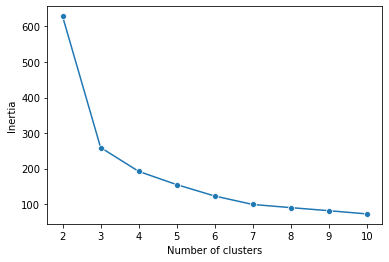

In [139]:
plot_pca = sns.lineplot(x=num_clusters, y=Inertia_pca, marker = 'o')
plot_pca.set_xlabel("Number of clusters");
plot_pca.set_ylabel("Inertia");

In [140]:
sil_scores_pca = kmeans_sil(num_clusters,wine_pca)

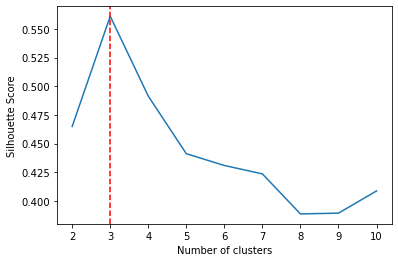

In [141]:
plot_pca = sns.lineplot(x=num_clusters, y=sil_scores_pca)
plot_pca.axvline(x=3, color='red', linestyle='--')
plot_pca.set_xlabel("Number of clusters");
plot_pca.set_ylabel("Silhouette Score");

We can observe, like the previous case, we have our data partitioned into **three clusters**.

In [122]:
KMeans_3pca = KMeans(n_clusters=3, random_state=42)
KMeans_3pca.fit(wine_comps)

KMeans(n_clusters=3, random_state=42)

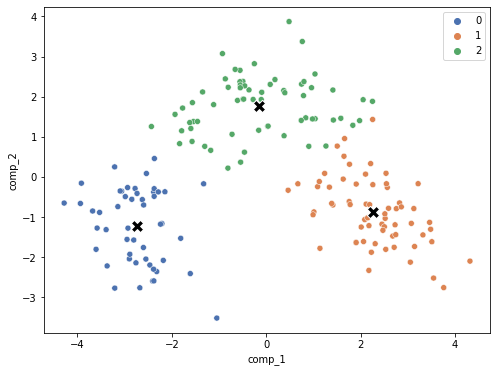

In [137]:
wine_comps['Cluster'] = KMeans_3pca.labels_

centroids = KMeans_3pca.cluster_centers_

centroids_comp_1 = centroids[:,0]
centroids_comp_2 = centroids[:,1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=wine_comps, x='comp_1', y='comp_2', hue='Cluster', palette="deep");
sns.scatterplot(x=centroids_comp_1, y=centroids_comp_2, marker='X', c=['black'], s=150);

Lets verify if it assigned each point to the right group of wine, comparing with the first column removed at the beginning.

In [132]:
Class_id = wines_df['Class_id']


concat_wines_comps = pd.concat([Class_id, wine_comps], axis=1)

concat_wines_comps.head()

,Class_id,comp_1,comp_2,Cluster
0,1,3.316751,-1.443463,1
1,1,2.209465,0.333393,1
2,1,2.516740,-1.031151,1
3,1,3.757066,-2.756372,1
4,1,1.008908,-0.869831,1


In [129]:
msk_pca = concat_wines_comps['Class_id'] == concat_wines_comps['Cluster']
msk_pca.value_counts()

True     172
False      6
dtype: int64

In [133]:
Accuracy_pca = (172/178)*100
print('Accuracy_pca =', round(Accuracy,2), '%')

Accuracy_pca = 96.63 %


# Observation:

Both analyses show that our dataset is divided into three clusters. Since we had the solution to the problem, we were able to compare the results obtained by the models with the actual data, observing a grouping accuracy of 96.63% for both cases.
